In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from collections import Counter
import glob
import statsmodels.api as sm
from statsmodels.api import OLS

In [2]:
!ls data/news

 media-db.articles_2010.csv   media-db.articles_2018.csv
 media-db.articles_2011.csv   media-db.articles_2019.csv
 media-db.articles_2012.csv  'News Articles-20200928T062930Z-001.zip'
 media-db.articles_2013.csv  'News Articles-20200928T062930Z-002.zip'
 media-db.articles_2014.csv  'News Articles-20200928T062930Z-003.zip'
 media-db.articles_2015.csv


In [ ]:
# Use for 2018.csv
# usecols=['articleTitle',  'articleUrl', 'publishedDate','sourceName','text']

# Use for 2019.csv
# usecols=['articleId',  'articleUrl', 'publishedYear', 'publishedMonth', 'publishedDate', 'sourceName','text']

In [3]:
filename_2018 = 'data/news/media-db.articles_2018.csv'
filename_2019 = 'data/news/media-db.articles_2019.csv'

In [4]:
with open(filename_2019) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
temp_list = [ x.split(",", 4) for x in content ]
df_2019 = pd.DataFrame(temp_list, columns=['articleId', 'publishedYear', 'publishedMonth', 'publishedDate','text'])
content = 0
df_2019['publishedOn'] = df_2019['publishedYear'] + "-" + df_2019["publishedMonth"] + "-" + df_2019["publishedDate"]
df_2019.drop(['publishedYear', 'publishedMonth', 'publishedDate'], axis=1, inplace=True)
df_2019.rename(columns={"publishedOn": "publishedDate"}, inplace=True)

In [5]:
df_2019.head()

,articleId,text,publishedDate
0,5ce49e0fe8e3fc471b678cd9,By PTIAHMEDABAD: A political row broke out on ...,2019-01-01
1,5ce49e12e8e3fc471b678cdd,By PTINEW DELHI: The armies of India and China...,2019-01-01
2,5ce49e15e8e3fc471b678ce1,"By PTIJAMNAGAR: Five members of a family, incl...",2019-01-01
3,5ce49e18e8e3fc471b678ce5,Harpreet Bajwa ByExpress News ServiceCHANDIGAR...,2019-01-01
4,5ce49e1ae8e3fc471b678ce9,By IANSNEW DELHI: Making resolutions and sched...,2019-01-01


In [6]:
df_2018 = pd.read_csv(filename_2018, usecols=['articleTitle',  'articleUrl', 'publishedDate','sourceName','text'])

In [7]:
keywords = ["pest attack", "pest", "Maharashtra"]#, "Haryana"]

In [8]:
def get_cotton_data(df):
    mask = np.column_stack([df[col].str.contains("cotton", na=False) for col in df])
    commodity_data = df.loc[mask.any(axis=1)]
    mask = np.column_stack([commodity_data[col].str.contains("|".join(keywords), na=False) for col in commodity_data])
    specific_news_cotton_data = commodity_data.loc[mask.any(axis=1)]
    return specific_news_cotton_data

In [9]:
df_2019 = get_cotton_data(df_2019)
df_2018 = get_cotton_data(df_2018)

In [10]:
df_2019["publishedDate"] = pd.to_datetime(df_2019["publishedDate"])
df_2018["publishedDate"] = pd.to_datetime(df_2018["publishedDate"])

In [ ]:
specific_news_cotton_data.dtypes

In [11]:
specific_news_cotton_data["publishedOn"] = pd.to_datetime(specific_news_cotton_data["publishedOn"])

NameError: name 'specific_news_cotton_data' is not defined

In [ ]:
specific_news_cotton_data.dtypes

In [ ]:
specific_news_cotton_data.head()

In [12]:
temp_df_2019 = df_2019.set_index("publishedDate")
temp_df_2018 = df_2018.set_index("publishedDate")

In [13]:
temp_list_2019 = temp_df_2019.index.month.tolist()
temp_list_2018 = temp_df_2018.index.month.tolist()

In [14]:
frequency_dict_2019 = dict(Counter(temp_df_2019.index.month.tolist()))
frequency_dict_2019

{1: 16, 2: 18, 3: 7, 4: 20, 5: 31, 6: 48, 7: 42, 8: 39, 9: 27, 10: 32, 11: 28}

In [15]:
news_articles_2019 = 0
for key,value in frequency_dict_2019.items():
    if key >=4:
        print(key)
        news_articles_2019 += value
news_articles_2019

4
5
6
7
8
9
10
11


267

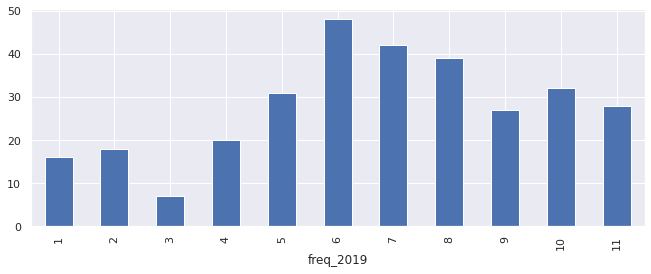

In [16]:
df = pd.DataFrame({'freq_2019': temp_list_2019})
df.groupby('freq_2019', as_index=False).size().plot(kind='bar')
plt.show()

In [17]:
frequency_dict_2018 = dict(Counter(temp_df_2018.index.month.tolist()))
frequency_dict_2018

{1: 44, 4: 33, 3: 38, 2: 44, 5: 30, 6: 9, 7: 5, 12: 14, 11: 17, 10: 7}

In [18]:
news_articles_2018 = 0
for key,value in frequency_dict_2018.items():
    if key >=4:
        print(key)
        news_articles_2018 += value
news_articles_2018

4
5
6
7
12
11
10


115

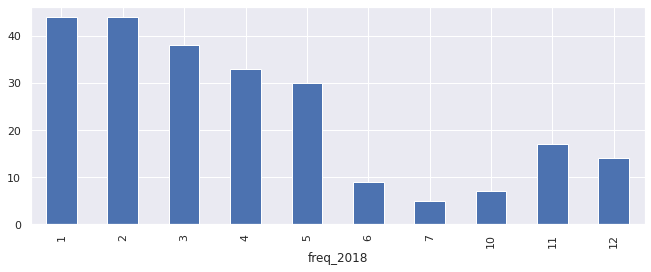

In [19]:
df = pd.DataFrame({'freq_2018': temp_list_2018})
df.groupby('freq_2018', as_index=False).size().plot(kind='bar')
plt.show()

In [ ]:
price_2019 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2019_January.csv")
price_2020 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2020_January.csv")

In [ ]:
price_2019.replace("NR", 0)
price_2019.head()

In [ ]:
price_2019['Variety'].unique()

In [ ]:
price_2020['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_2020['Minimum Price(Rs./Quintal)'], errors="coerce")
price_2020['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_2020['Maximum Price(Rs./Quintal)'], errors="coerce")

price_2019['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_2019['Minimum Price(Rs./Quintal)'], errors="coerce")
price_2019['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_2019['Maximum Price(Rs./Quintal)'], errors="coerce")

In [ ]:
price_2019.dtypes

In [ ]:
price_2020.dtypes

In [ ]:
price_2019.describe()

In [ ]:
price_2020.describe()

In [ ]:
price_feb_2019 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2019_February.csv")
price_feb_2020 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2020_February.csv")

In [ ]:
price_feb_2020['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_feb_2020['Minimum Price(Rs./Quintal)'], errors="coerce")
price_feb_2020['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_feb_2020['Maximum Price(Rs./Quintal)'], errors="coerce")

price_feb_2019['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_feb_2019['Minimum Price(Rs./Quintal)'], errors="coerce")
price_feb_2019['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_feb_2019['Maximum Price(Rs./Quintal)'], errors="coerce")

In [ ]:
price_feb_2020.describe()

In [ ]:
price_feb_2019.describe()

In [ ]:
price_july_2019 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2019_July.csv")
price_aug_2019 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2019_August.csv")
price_sept_2019 = pd.read_csv("data/cotton-price/Cotton/Maharashtra/mynewdata_2019_September.csv")

In [ ]:
price_july_2019['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_july_2019['Minimum Price(Rs./Quintal)'], errors="coerce")
price_july_2019['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_july_2019['Maximum Price(Rs./Quintal)'], errors="coerce")

price_aug_2019['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_aug_2019['Minimum Price(Rs./Quintal)'], errors="coerce")
price_aug_2019['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_aug_2019['Maximum Price(Rs./Quintal)'], errors="coerce")

price_sept_2019['Minimum Price(Rs./Quintal)'] = pd.to_numeric(price_sept_2019['Minimum Price(Rs./Quintal)'], errors="coerce")
price_sept_2019['Maximum Price(Rs./Quintal)'] = pd.to_numeric(price_sept_2019['Maximum Price(Rs./Quintal)'], errors="coerce")

In [ ]:
price_aug_2019.describe()

In [ ]:
price_sept_2019.describe()

In [ ]:
price_july_2019.describe()

In [ ]:
price_july_2019['Minimum Price(Rs./Quintal)'].mean()

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
def get_avg_price(state, month, year):
    min_price = 0
    max_price = 0
    arrival_volumes = 0
    try:
        df = pd.read_csv("data/cotton-price/Cotton/{0}/mynewdata_{2}_{1}.csv".format(state, month, year))
        print("Number of data points for {0} in {1}, {2} is: {3}".format(state, month, year,df.shape))
        df['Minimum Price(Rs./Quintal)'] = pd.to_numeric(df['Minimum Price(Rs./Quintal)'], errors="coerce")
        df['Maximum Price(Rs./Quintal)'] = pd.to_numeric(df['Maximum Price(Rs./Quintal)'], errors="coerce")
        print("Average Minimum Price for {0} in {1}, {2} is: {3}".format(state, month, year, df['Minimum Price(Rs./Quintal)'].mean()))
        print("Average Maximum Price for {0} in {1}, {2} is: {3}".format(state, month, year, df['Maximum Price(Rs./Quintal)'].mean()))
#         return df['Minimum Price(Rs./Quintal)'].mean(), df['Maximum Price(Rs./Quintal)'].mean()
        print("Average Arrival Volumes for {0} in {1}, {2} is: {3}".format(state, month, year, df['Arrivals (Tonnes)'].mean()))
        min_price = df['Minimum Price(Rs./Quintal)'].mean()
        max_price = df['Maximum Price(Rs./Quintal)'].mean()
        arrival_volumes = df['Arrivals (Tonnes)'].mean()
    except:
        print("Error for {0}, {1}, {2}".format(state, month, year))
    return min_price, max_price, arrival_volumes

In [ ]:
min_price = [] 
max_price = []
arrival_volumes = []

In [ ]:
for month in months:
    temp_min_price, temp_max_price, temp_arrival_volume = get_avg_price("Maharashtra", month, "2019")
    min_price.append(temp_min_price)
    max_price.append(temp_max_price)
    arrival_volumes.append(temp_arrival_volume)

In [ ]:
plt.plot(months, min_price)
plt.title('Average Min Price Vs Month(2019)')
plt.xlabel('Month')
plt.ylabel('Average Min Price')
plt.show()

In [ ]:
plt.plot(months, max_price)
plt.title('Average Max Price Vs Month(2019)')
plt.xlabel('Month')
plt.ylabel('Average Min Price')
plt.show()

In [ ]:
plt.plot(months, arrival_volumes)
plt.title('Average Arrival Volumes Vs Month(2019)')
plt.xlabel('Month')
plt.ylabel('Average Arrival Volumes')
plt.show()

In [ ]:
min_price = [] 
max_price = []
arrival_volumes = []
for month in months:
    temp_min_price, temp_max_price, temp_arrival_volume = get_avg_price("Maharashtra", month, "2018")
    min_price.append(temp_min_price)
    max_price.append(temp_max_price)
    arrival_volumes.append(temp_arrival_volume)
plt.plot(months, min_price)
plt.title('Average Min Price Vs Month(2018)')
plt.xlabel('Month')
plt.ylabel('Average Min Price')
plt.show()
plt.plot(months, max_price)
plt.title('Average Max Price Vs Month(2018)')
plt.xlabel('Month')
plt.ylabel('Average Min Price')
plt.show()
plt.plot(months, arrival_volumes)
plt.title('Average Arrival Volumes Vs Month(2018)')
plt.xlabel('Month')
plt.ylabel('Average Arrival Volumes')
plt.show()

In [2]:
base_data_path = "data/cotton-price/Cotton/"

In [3]:
cotton_data_punjab = base_data_path + "Punjab/"

In [87]:
files = glob.glob(cotton_data_punjab + '*.csv')
df = pd.concat([pd.read_csv(fp) for fp in files], ignore_index=True)

In [88]:
len(df)

4246

In [89]:
df[df['Arrival Date'].isnull()]

,Market,Arrival Date,Arrivals (Tonnes),Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Unnamed: 7
170,NaN,NaN,NaN,Narma BT Cotton,5040,5300,5235,NaN
172,NaN,NaN,NaN,Narma BT Cotton,5155,5350,5270,NaN
174,NaN,NaN,NaN,Narma BT Cotton,5220,5305,5285,NaN
176,NaN,NaN,NaN,Narma BT Cotton,5200,5300,5265,NaN
178,NaN,NaN,NaN,Narma BT Cotton,5250,5325,5290,NaN
...,...,...,...,...,...,...,...,...
4002,NaN,NaN,NaN,Narma BT Cotton,5256,5371,5356,NaN
4004,NaN,NaN,NaN,Narma BT Cotton,5250,5307,5299,NaN
4006,NaN,NaN,NaN,Narma BT Cotton,5230,5330,5300,NaN
4204,NaN,NaN,NaN,Cotton (Unginned),5200,5200,5200,NaN


In [67]:
df.dtypes

Market                         object
Arrival Date                   object
Arrivals (Tonnes)             float64
Variety                        object
Minimum Price(Rs./Quintal)     object
Maximum Price(Rs./Quintal)     object
Modal Price(Rs./Quintal)       object
Unnamed: 7                    float64
dtype: object

In [68]:
df.head()

,Market,Arrival Date,Arrivals (Tonnes),Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Unnamed: 7
0,Bareta,01/02/2020,15.9,,NR,NR,NR,NaN
1,NaN,03/02/2020,12.5,,NR,NR,NR,NaN
2,NaN,04/02/2020,13.5,,NR,NR,NR,NaN
3,NaN,06/02/2020,8.5,,NR,NR,NR,NaN
4,NaN,07/02/2020,6.6,,NR,NR,NR,NaN


In [69]:
df = df.set_index(df['Arrival Date'])

In [70]:
df.head()

,Market,Arrival Date,Arrivals (Tonnes),Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Unnamed: 7
Arrival Date,,,,,,,,
01/02/2020,Bareta,01/02/2020,15.9,,NR,NR,NR,NaN
03/02/2020,NaN,03/02/2020,12.5,,NR,NR,NR,NaN
04/02/2020,NaN,04/02/2020,13.5,,NR,NR,NR,NaN
06/02/2020,NaN,06/02/2020,8.5,,NR,NR,NR,NaN
07/02/2020,NaN,07/02/2020,6.6,,NR,NR,NR,NaN


In [71]:
df.index = pd.to_datetime(df.index)

In [72]:
df.dtypes

Market                         object
Arrival Date                   object
Arrivals (Tonnes)             float64
Variety                        object
Minimum Price(Rs./Quintal)     object
Maximum Price(Rs./Quintal)     object
Modal Price(Rs./Quintal)       object
Unnamed: 7                    float64
dtype: object

In [73]:
df.head()

,Market,Arrival Date,Arrivals (Tonnes),Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Unnamed: 7
Arrival Date,,,,,,,,
2020-01-02,Bareta,01/02/2020,15.9,,NR,NR,NR,NaN
2020-03-02,NaN,03/02/2020,12.5,,NR,NR,NR,NaN
2020-04-02,NaN,04/02/2020,13.5,,NR,NR,NR,NaN
2020-06-02,NaN,06/02/2020,8.5,,NR,NR,NR,NaN
2020-07-02,NaN,07/02/2020,6.6,,NR,NR,NR,NaN


In [82]:
df['Arrival Date'].isna().sum()

197

In [86]:
df[df['Arrival Date'].isnull()]

,Market,Arrival Date,Arrivals (Tonnes),Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Unnamed: 7
Arrival Date,,,,,,,,
NaT,NaN,NaN,NaN,Narma BT Cotton,5040,5300,5235,NaN
NaT,NaN,NaN,NaN,Narma BT Cotton,5155,5350,5270,NaN
NaT,NaN,NaN,NaN,Narma BT Cotton,5220,5305,5285,NaN
NaT,NaN,NaN,NaN,Narma BT Cotton,5200,5300,5265,NaN
NaT,NaN,NaN,NaN,Narma BT Cotton,5250,5325,5290,NaN
...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,Narma BT Cotton,5256,5371,5356,NaN
NaT,NaN,NaN,NaN,Narma BT Cotton,5250,5307,5299,NaN
NaT,NaN,NaN,NaN,Narma BT Cotton,5230,5330,5300,NaN


In [74]:
df['Minimum Price(Rs./Quintal)'].str.count("NR").sum()

292.0

In [75]:
temp_df = df.copy()

In [76]:
 temp_df.drop(temp_df.columns.difference(['Minimum Price(Rs./Quintal)']), 1, inplace=True)

In [77]:
temp_df.sort_index(inplace=True)

In [78]:
temp_df.head()

,Minimum Price(Rs./Quintal)
Arrival Date,
2018-01-01,4400
2018-01-01,4600
2018-01-01,4175
2018-01-01,4000
2018-01-01,4800


In [80]:
temp_df.index.isna().sum()

197

In [40]:
temp_df.index.dtype

dtype('<M8[ns]')

In [37]:
temp_df = temp_df.replace('NR', 0)

In [50]:
temp_df.index.month

Float64Index([ 1.0,  3.0,  4.0,  6.0,  7.0,  8.0, 10.0, 11.0, 12.0,  2.0,
              ...
               4.0,  3.0,  3.0,  4.0,  5.0,  6.0,  7.0,  9.0, 12.0,  4.0],
             dtype='float64', name='Arrival Date', length=4246)

In [61]:
temp_df = temp_df.groupby(temp_df.index.month)

In [62]:
temp_df.head()

,Minimum Price(Rs./Quintal)
Arrival Date,
2018-01-01,4400
2018-01-01,4600
2018-01-01,4175
2018-01-01,4000
2018-01-01,4800
...,...
NaT,5040
NaT,5155
NaT,5220


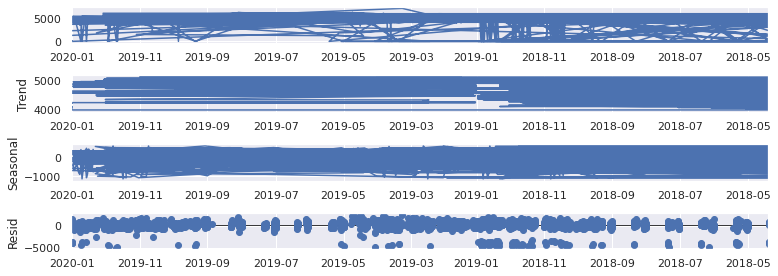

In [48]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# series = read_csv('airline-passengers.csv', header=0, index_col=0)
result = seasonal_decompose(temp_df, model='additive', period=365)
result.plot()
pyplot.show()
